In [126]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt

In [127]:
college_df = pd.read_csv('Resources/salaries_by_college_type_data.csv')
region_df = pd.read_csv('Resources/salaries_by_region_data.csv')
majors_df = pd.read_csv('Resources/degrees_that_pay_back_data.csv')

datasets_list = [college_df, region_df, majors_df]

In [128]:
college_columns = {
    "School Name" : "name",
    "School Type" : "type",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90",
    "In State Tuition" : "in_tuition",
    "Out of State Tuition" : "out_tuition"
}

college_df.rename(columns=college_columns, inplace=True)

region_columns = {
    "School Name" : "name",
    "Region" : "region",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90",
    "In State Tuition" : "in_tuition",
    "Out of State Tuition" : "out_tuition"
}

region_df.rename(columns=region_columns, inplace=True)

majors_columns = {
    "Undergraduate Major" : "name",
    "Starting Median Salary" : "start_p50",
    "Mid-Career Median Salary" : "mid_p50",
    "Percent change from Starting to Mid-Career Salary" : "increase",
    "Mid-Career 10th Percentile Salary" : "mid_p10",
    "Mid-Career 25th Percentile Salary" : "mid_p25",
    "Mid-Career 75th Percentile Salary" : "mid_p75",
    "Mid-Career 90th Percentile Salary" : "mid_p90"
}

majors_df.rename(columns=majors_columns, inplace=True)

In [129]:
selected_columns = ["start_p50", "mid_p50", "mid_p10", "mid_p25", "mid_p75", "mid_p90"]

for dataset in datasets_list:
    for column in selected_columns:
        dataset[column] = dataset[column].str.replace("$","")
        dataset[column] = dataset[column].str.replace(",","")
        dataset[column] = pd.to_numeric(dataset[column])

In [130]:
# Storyline: We are a student who just graduated from high school who is interested in STEM.
# which school will give us the most "bang for our buck?"
# first graph tuitions by school type (both in and out of state) - avg out of state will be higher than in state
# second graph for the starting salaries for the top STEM majors (accounting, aerosapce, biology, chemical engineering/
#        chemistry, civil engineering, computer engineering, computer science, electrical engineering, finance, 
#        industrial engineering, information technology, MIS, math, mech. engineering, physics) - avg salary will be higher than $50K
# third graph out of state tuition for the top STEM schools (see forbes list) - MIT will have the highest tuition/
#        avg cost of tuition will be $50K(per year)
# 

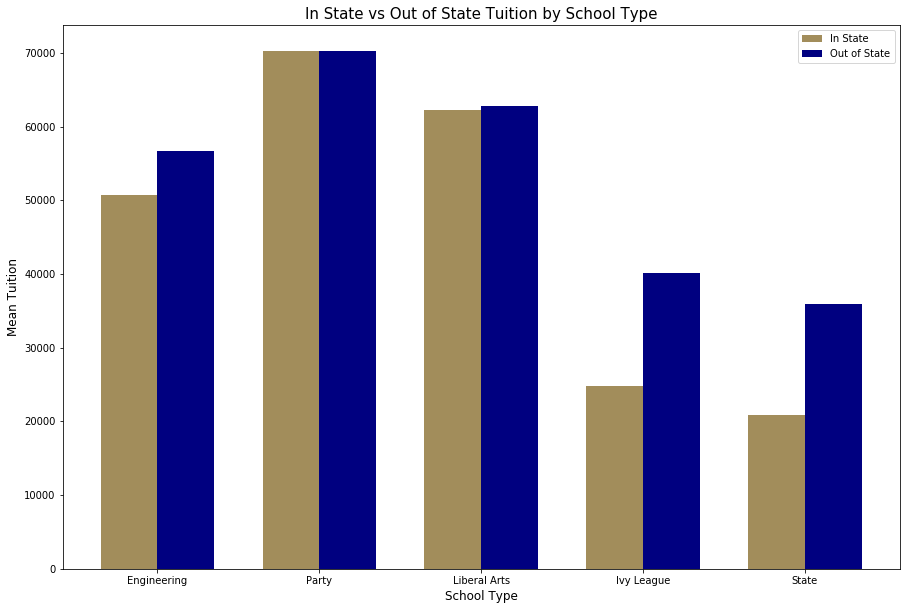

<Figure size 432x288 with 0 Axes>

In [145]:
# TUITIONS BY SCHOOL TYPE: first graph

in_state_type = college_df.groupby("type")["in_tuition"].mean()

out_state_type = college_df.groupby("type")["out_tuition"].mean()

index = np.arange(5)
bar_width = 0.35

fig, ax = plt.subplots(1,1,figsize=(15,10))
instate = ax.bar(index, in_state_type, bar_width,
                label="In State", color="#a28d5b")

outstate = ax.bar(index+bar_width, out_state_type,
                 bar_width, label="Out of State", color="navy")

ax.set_xlabel('School Type', size =12)
ax.set_ylabel('Mean Tuition', size=12)
ax.set_title('In State vs Out of State Tuition by School Type', size=15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Engineering","Party", "Liberal Arts", "Ivy League","State"])
ax.legend()

plt.show()

plt.savefig("Images/In State vs Out of State Tuition by School Type.png")

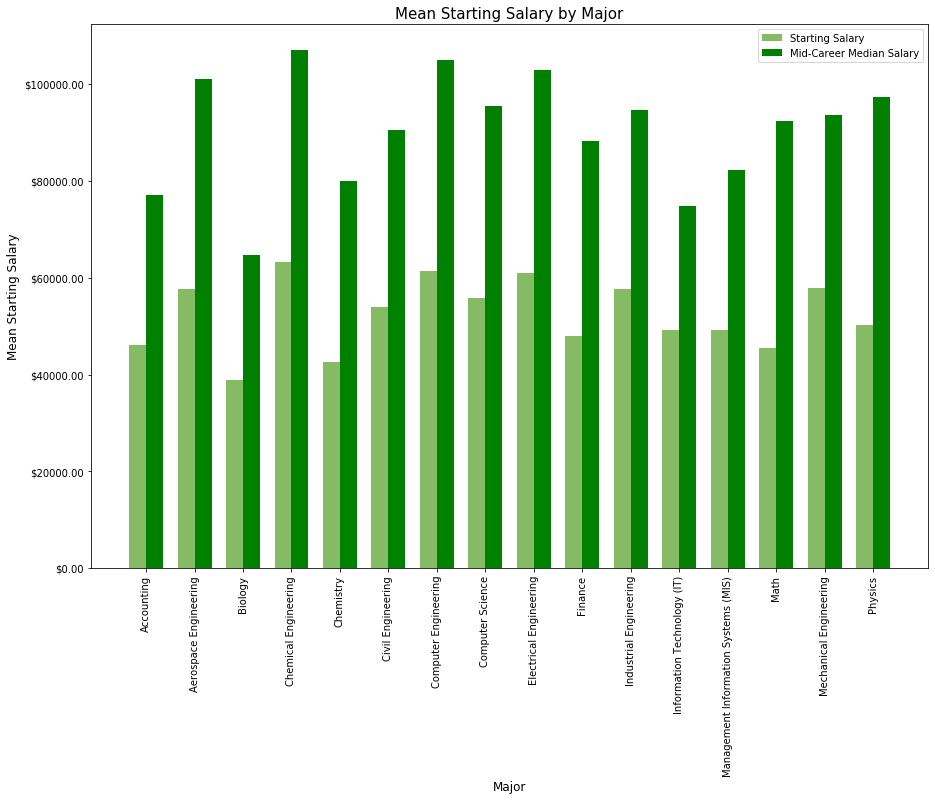

<Figure size 432x288 with 0 Axes>

In [143]:
# STARTING SALARIES FOR STEM: second graph

index = np.arange(16)
bar_width = 0.35

formatter = ticker.FormatStrFormatter('$%1.2f')

fig, ax = plt.subplots(1,1,figsize=(15,10))
st_salary = ax.bar(index, majors_df["start_p50"], bar_width,
                label="Starting Salary", color="#85bb65")
med_salary = ax.bar(index+bar_width, majors_df["mid_p50"],
                 bar_width, label="Mid-Career Median Salary", color="green")

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Major', size=12)
ax.set_ylabel('Mean Starting Salary', size=12)
ax.set_title('Mean Starting Salary by Major', size=15)
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation = "vertical")
ax.set_xticklabels(majors_df["name"], ha="center")
ax.legend()
#ax.figure(figsize=(20,15))

plt.show()

plt.savefig("Images/Mean Starting Salary by Major.png")

In [134]:
# Created new df with only Top 8 school names and out of state tuition for next graph
school_tuition_df = college_df.loc[0:9, ["name", "out_tuition"]]
school_tuition_df.drop(index=[3,4], inplace=True)
school_tuition_df


,name,out_tuition
0,Massachusetts Institute of Technology (MIT),67342.0
1,California Institute of Technology (CIT),67887.0
2,Harvey Mudd College,75003.0
5,Worcester Polytechnic Institute (WPI),65304.0
6,Carnegie Mellon University (CMU),69883.0
7,Rensselaer Polytechnic Institute (RPI),69140.0
8,Georgia Institute of Technology,44904.0
9,Colorado School of Mines,51753.0


No handles with labels found to put in legend.


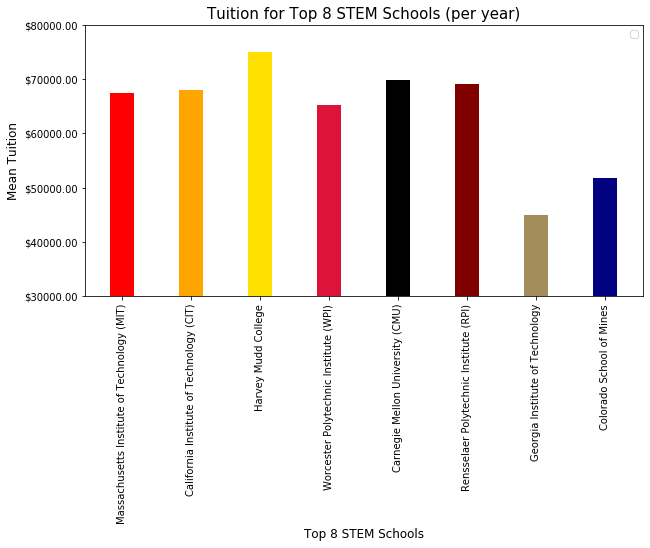

<Figure size 432x288 with 0 Axes>

In [146]:
# OUT OF STATE TUITION FOR TOP STEM SCHOOLS (per year); third graph

index = np.arange(8)
bar_width = 0.35

# Get a color map
my_cmap = cm.get_cmap('jet')
 
fig, ax = plt.subplots(1,1,figsize=(10,5))

formatter = ticker.FormatStrFormatter('$%1.2f')

out_of_state_tuition = ax.bar(index, school_tuition_df["out_tuition"], bar_width, label=None,
                              color=["red","orange","#ffdf00","crimson","black","maroon","#a28d5b","navy"])


ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Mean Tuition', size =12)
ax.set_title('Tuition for Top 8 STEM Schools (per year)', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_tuition_df["name"], ha="center")
plt.xticks(rotation = "vertical")
plt.ylim(30000, 80000)
ax.legend()
plt.show()

plt.savefig("Images/Tuition for Top 8 STEM Schools.png")

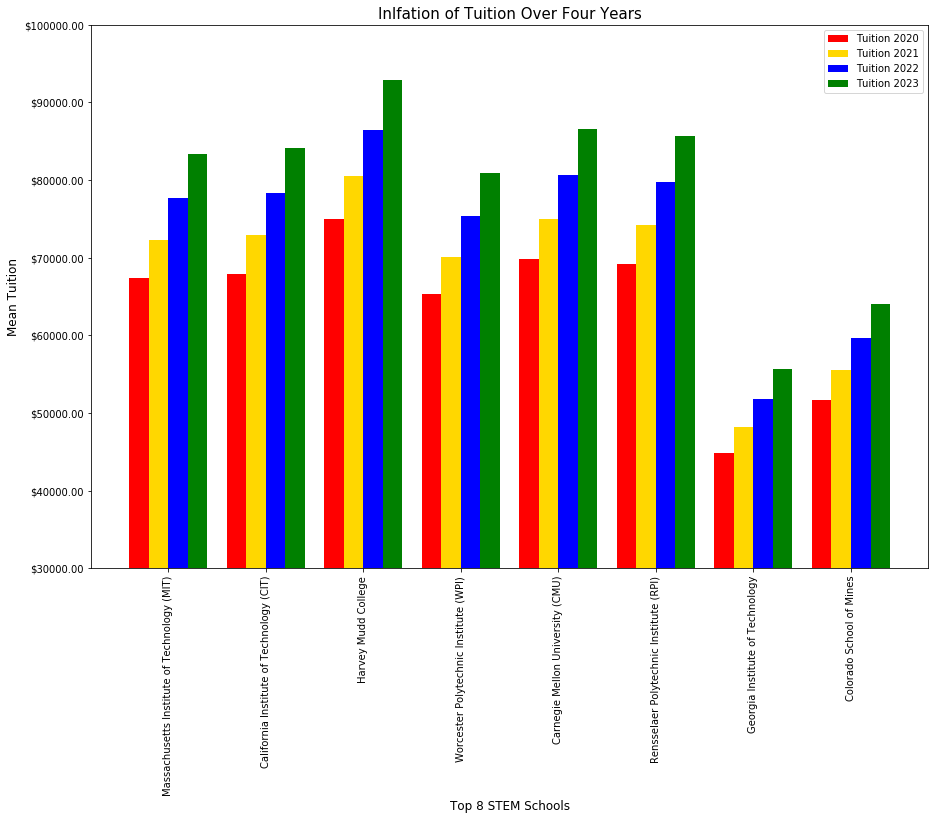

<Figure size 432x288 with 0 Axes>

In [178]:
# INFLATION RATE OF TUITION OVER 4 years: fourth graph

index = np.arange(8)
bar_width = 0.20

tuition2= school_tuition_df["out_tuition"]*1.074
tuition3 = tuition2*1.074
tuition4 = tuition3*1.074
 
fig, ax = plt.subplots(1,1,figsize=(15,10))

formatter = ticker.FormatStrFormatter('$%1.2f')

twenty_twenty = ax.bar(index, school_tuition_df["out_tuition"], bar_width, label="Tuition 2020",
                              color=["red"])
twenty_twenty_one = ax.bar(index + bar_width, tuition2, bar_width, label="Tuition 2021",
                              color=["gold"])
twenty_twenty_two = ax.bar(index + bar_width*2, tuition3, bar_width, label="Tuition 2022",
                              color=["blue"])
twenty_twenty_three = ax.bar(index + bar_width*3, tuition4, bar_width, label="Tuition 2023",
                              color=["green"])

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Mean Tuition', size =12)
ax.set_title('Inlfation of Tuition Over Four Years', size =15)
ax.set_xticks(index + bar_width*1.5 )
ax.set_xticklabels(school_tuition_df["name"], ha="center")
plt.xticks(rotation = "vertical")
plt.ylim(30000, 100000)
ax.legend()
plt.show()

plt.savefig("Images/Tuition Inflation for Top 8 STEM Schools.png")

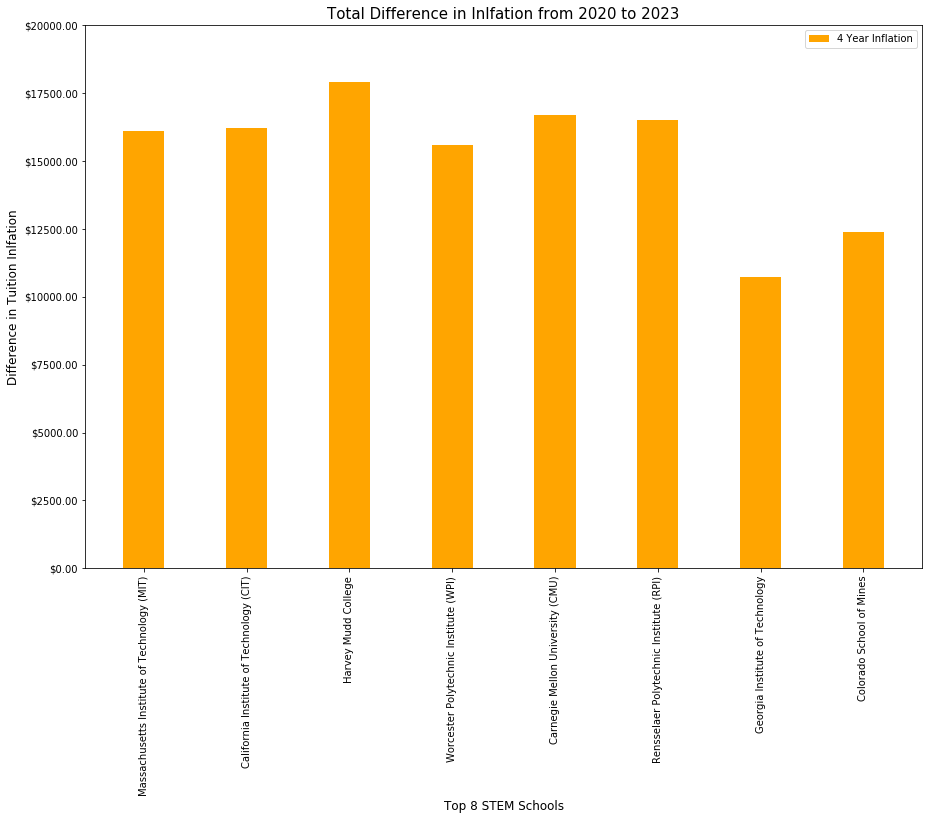

<Figure size 432x288 with 0 Axes>

In [181]:
# INFLATION DIFFERENCE: fifth graph

index = np.arange(8)
bar_width = 0.40

inflation_diff = tuition4 - (school_tuition_df["out_tuition"])
 
fig, ax = plt.subplots(1,1,figsize=(15,10))

formatter = ticker.FormatStrFormatter('$%1.2f')

inflation = ax.bar(index, inflation_diff, bar_width, label="4 Year Inflation",
                              color=["orange"])


ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Difference in Tuition Inlfation', size =12)
ax.set_title('Total Difference in Inlfation from 2020 to 2023', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_tuition_df["name"], ha="center")
plt.xticks(rotation = "vertical")
plt.ylim(0, 20000)
ax.legend()
plt.show()

plt.savefig("Images/Difference in Tuition Inflation for Top 8 STEM Schools.png")

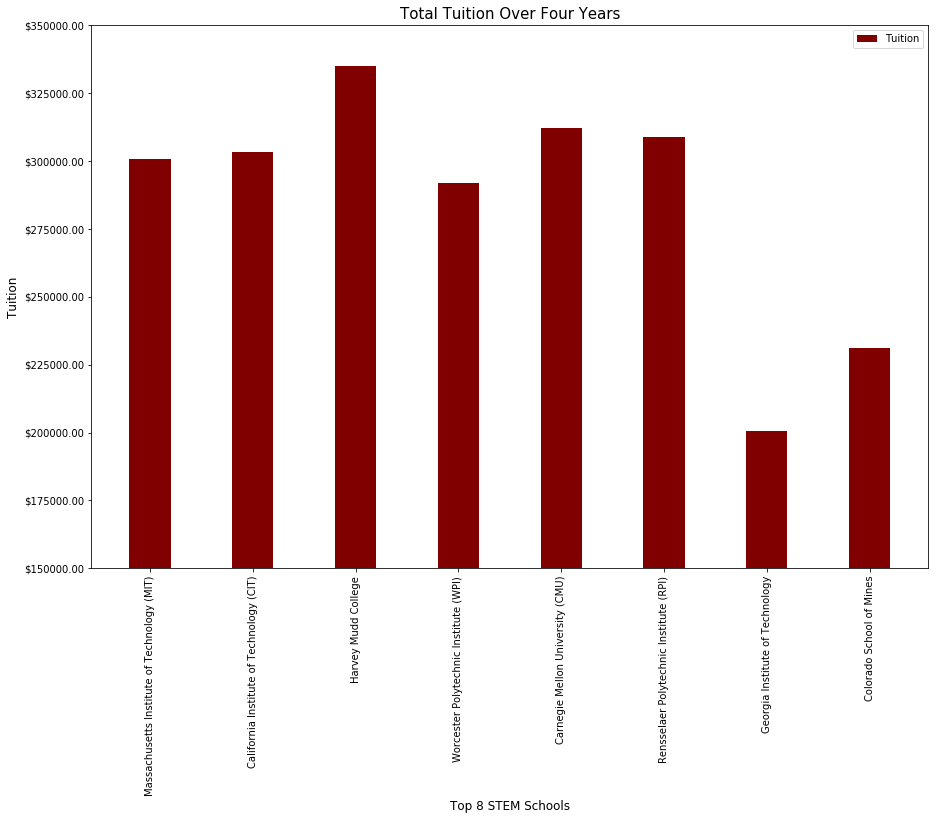

<Figure size 432x288 with 0 Axes>

In [192]:
# TOTAL TUITION COST (4 years): sixth graph

index = np.arange(8)
bar_width = 0.40

total_tuition = school_tuition_df["out_tuition"] + tuition2 + tuition3 + tuition4
 
fig, ax = plt.subplots(1,1,figsize=(15,10))

formatter = ticker.FormatStrFormatter('$%1.2f')

total_tuition = ax.bar(index, total_tuition, bar_width, label="Tuition",
                              color=["maroon"])

ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Top 8 STEM Schools', size =12)
ax.set_ylabel('Tuition', size =12)
ax.set_title('Total Tuition Over Four Years', size =15)
ax.set_xticks(index)
ax.set_xticklabels(school_tuition_df["name"], ha="center")
plt.xticks(rotation = "vertical")
plt.ylim(150000, 350000)
ax.legend()
plt.show()

plt.savefig("Images/Total Tuition for Top 8 STEM Schools.png")